## Principal component analysis

PCA is used to decompose a multivariate dataset in a set of successive **orthogonal** components that explain **a maximum amount of the variance**.


In [1]:
# @title
import datetime
print(datetime.datetime.now())

2025-02-17 00:28:05.156155


### iris example

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn import datasets
iris = datasets.load_iris()
iris_df = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_df['target'] = list(map(lambda x: iris.target_names[x], iris.target))
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Question: What is the meanings of 'std' and 'var'?

In [5]:
# plotly/dash is an interactive plotting tool.

import plotly.express as px
_df = px.data.iris()
fig = px.scatter_3d(_df, x='sepal_length', y='petal_length', z='petal_width', color='species')
fig.show()

Question: what is the meanings of 'change the viewpoint'?

When we take the dot product of a **matrix** and a **vector**, the resulting vector is a **rotated** and **scaled** version of the original one.

PCA uaually has several steps:
* original data
* standardization
* PCA
  * covariance matrix
  * eigenvectors and eigenvalues of the covariance matrix
  * choose components and forming a feature vector
* derive the new data set

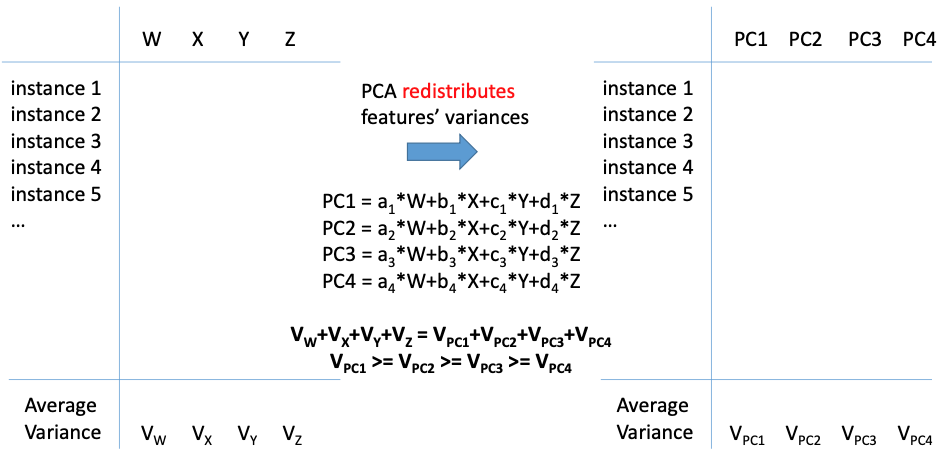

* PCA would like to choose a widest width, because with this point of view, the widest width makes us have a better chance to differentiate these data points.
* Features are used to describe data and can distinguish a data point from another.
* For a set of data points, a feature with **zero variance** is meaningless. A feature with **larger variance** is more meaningful.
* Generally, PCA combines original features (e.g., $W$, $X$, $Y$, $\cdots$) to populate new features (e.g., $PC1$, $PC2$, $\cdots$).
* The variances of the original features (i.e., $V_W$, $V_X$, $\cdots$) are **redistributed** to the variances of new features (i.e., $V_{PC1}$, $V_{PC2}, $\cdots$) in order.
* A data point can be described by original features or new features without losing any information.
* But for the convenience of analyzing, a small set of features having **large aggregated variance** may be better than a larger set of features having (almost) the same variance.
* For example, color can be represented as (R, G, B), (L, a, b), (C, M, Y, K), or (H, S, V).

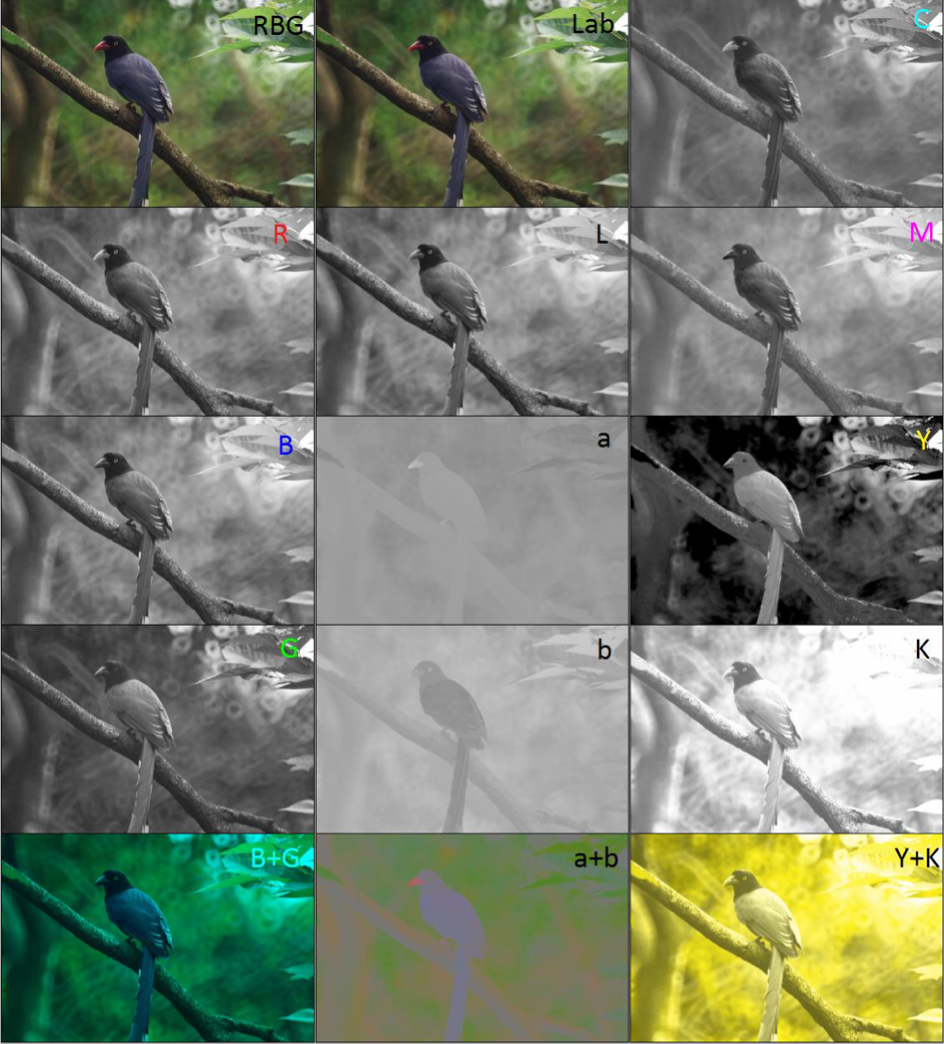

### Small example

In [6]:
# original data
xy = [[2.5, 2.4], [0.5, 0.7], [2.2, 2.9], [1.9, 2.2], [3.1, 3.0], [2.3, 2.7],
      [2.0, 1.6], [1.0, 1.1], [1.5, 1.6], [1.1, 0.9]]
_df = pd.DataFrame(xy, columns=['x','y'])
_df

,x,y
0,2.5,2.4
1,0.5,0.7
2,2.2,2.9
3,1.9,2.2
4,3.1,3.0
5,2.3,2.7
6,2.0,1.6
7,1.0,1.1
8,1.5,1.6
9,1.1,0.9


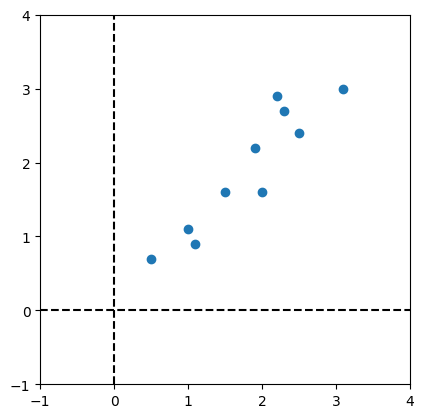

In [7]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x = _df.x, y = _df.y)
plt.plot([0, 0], [-1, 4], "k--")
plt.plot([-1, 4], [0, 0], "k--")
ax.set_xlim(-1,4)
ax.set_ylim(-1,4)
plt.show()

In [8]:
# standardization

# or any scaling you want
# this example we only do translation
# we want to demonstrate the sum of var does not change.
scaled_df = _df.apply(lambda s: s-s.mean())

# or standardization
#scaled_df = _df.apply(lambda s: (s-s.mean())/(s.std()))

scaled_df

,x,y
0,0.69,0.49
1,-1.31,-1.21
2,0.39,0.99
3,0.09,0.29
4,1.29,1.09
5,0.49,0.79
6,0.19,-0.31
7,-0.81,-0.81
8,-0.31,-0.31
9,-0.71,-1.01


In [9]:
print(scaled_df.x.var(), scaled_df.y.var())
print(scaled_df.x.var() + scaled_df.y.var())

0.6165555555555557 0.7165555555555556
1.3331111111111114


In [10]:
# covariance matrix
cov_df = scaled_df.cov()
cov_df

,x,y
x,0.616556,0.615444
y,0.615444,0.716556


Covariance $= cov(X,Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{(n-1)}$

Covariance Matrix $= cov = \left( \begin{array}{cc} cov(X,X) & cov(X,Y) \\
cov(Y,X) & cov(Y,Y) \end{array} \right)$

$cov(X,X) = var(X), cov(X,Y) = cov(Y,X)$

In [11]:
# eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(cov_df.values)

In [12]:
# for computaion efficiency, usually we use SVD to find eigenvectors
# u is eigenvectors, s is eigenvalues;
# the answers of eig and svd should be the same.
u,s,v = np.linalg.svd(cov_df.values)

* $A V = \lambda V$
* $A$ is an $n \times n$ matrix (i.e., $cov$).
  * used for rotation and scaling
* $\lambda$ is the eigenvalue of $A$.
* $V$ is the eigenvector of $A$.
  * eigenvector are those vectors who **only get scaled** or **do not change at all**.



In [13]:
# A
eigenvalues

array([0.0490834 , 1.28402771])

In [14]:
# V
eigenvectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

$\left( \begin{array}{cc} 0.616556 & 0.615444 \\
0.615444 & 0.716556 \end{array} \right) \cdot \left( \begin{array}{c} -0.73517866 \\ 0.6778734 \end{array} \right) = 0.0490834 \left( \begin{array}{c} -0.73517866 \\ 0.6778734 \end{array} \right)$

$\left( \begin{array}{cc} 0.616556 & 0.615444 \\
0.615444 & 0.716556 \end{array} \right) \cdot \left( \begin{array}{c} -0.6778734 \\ -0.73517866 \end{array} \right) = 1.28402771 \left( \begin{array}{c} -0.6778734 \\ -0.73517866 \end{array} \right)$


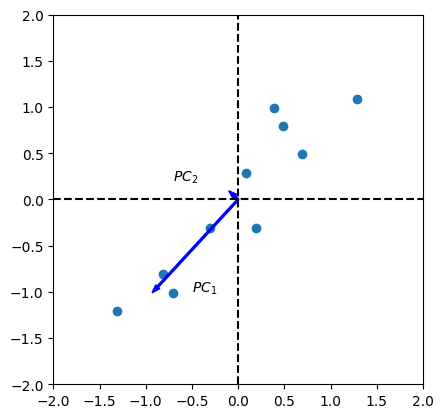

In [15]:
import math
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

plt.plot([0, 0], [-2, 2], "k--")
plt.plot([-2, 2], [0, 0], "k--")

plt.scatter(x = scaled_df.x, y = scaled_df.y)

plt.text(-0.5, -1.0, '$PC_1$')
plt.arrow(0, 0, eigenvectors[0][1] * eigenvalues[1],
          eigenvectors[1][1] * eigenvalues[1],
          width = 0.02, color= "blue")

plt.text(-0.7, 0.2, '$PC_2$')
plt.arrow(0, 0, eigenvectors[0][0] * eigenvalues[0],
          eigenvectors[1][0] * eigenvalues[0],
          width = 0.02, color= "blue")

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()


The data gets stretched in the direction of the eigenvector with the bigger variance/eigenvalue and squeezed along the axis of the eigenvector with the smaller variance.

In [16]:
def point_on_line(a, b, p):
    ap = p - a
    ab = b - a
    result = a + np.dot(ap, ab) / np.dot(ab, ab) * ab
    return result

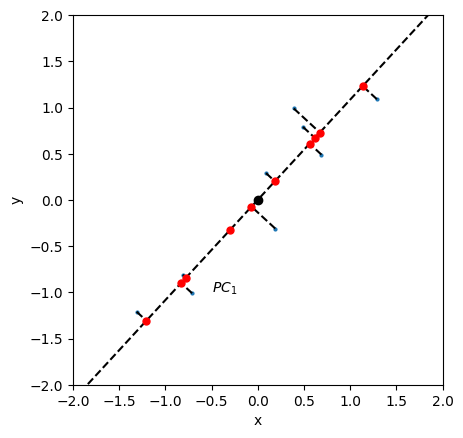

In [17]:
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x = scaled_df.x, y = scaled_df.y, s=4)
plt.text(-0.5, -1.0, '$PC_1$')

slope = eigenvectors[1][1]/eigenvectors[0][1]
plt.plot([-2, 2], [-2*slope, 2*slope], "k--")
plt.plot([0], [0], marker='o', markersize=6, color="black")

O_p = np.array([0.0, 0.0])
s_p = np.array([eigenvectors[0][1], eigenvectors[1][1]])
for index, row in scaled_df.iterrows():
  proj_x, proj_y = point_on_line(O_p, s_p, np.array([row.x, row.y]))
  plt.plot([row.x, proj_x], [row.y, proj_y], "k--")
  plt.plot([proj_x], [proj_y], marker='o', markersize=5, color="red")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
plt.show()

Note: the total length of the project lines are 'reconstruction errors', and $PC_1$ should have minimal sum of errors. Minimized errors guarantees largest variance. (Try to draw another line.)

In [18]:
# choose components and forming a feature vector


$\left( \begin{array}{cc} x & y \end{array} \right) \cdot \left( \begin{array}{cc} -0.6778734 & -0.73517866 \\
-0.73517866 & 0.6778734 \end{array} \right) = \left( \begin{array}{cc} PC_1 & PC_2 \end{array} \right)$

or

$PC_1 = -0.6778734 * x - 0.73517866*y$

$PC_2 = -0.73517866 * x + 0.6778734*y$

In [19]:
# derive the new data set
pca_df = scaled_df.copy()
pca_df['PC1'] = eigenvectors[0][1]*pca_df.x + eigenvectors[1][1]*pca_df.y
pca_df['PC2'] = eigenvectors[0][0]*pca_df.x + eigenvectors[1][0]*pca_df.y
pca_df

,x,y,PC1,PC2
0,0.69,0.49,-0.827970,-0.175115
1,-1.31,-1.21,1.777580,0.142857
2,0.39,0.99,-0.992197,0.384375
3,0.09,0.29,-0.274210,0.130417
4,1.29,1.09,-1.675801,-0.209498
5,0.49,0.79,-0.912949,0.175282
6,0.19,-0.31,0.099109,-0.349825
7,-0.81,-0.81,1.144572,0.046417
8,-0.31,-0.31,0.438046,0.017765
9,-0.71,-1.01,1.223821,-0.162675


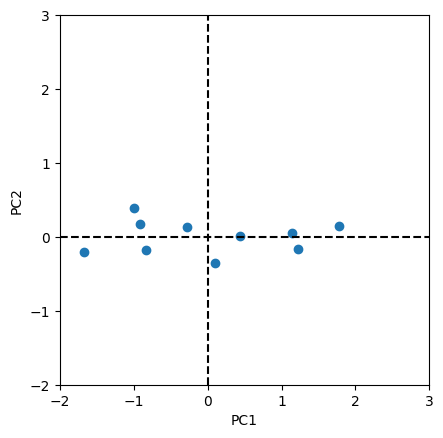

In [20]:
# New space!
fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
plt.scatter(x = pca_df.PC1, y = pca_df.PC2)
plt.plot([0, 0], [-2, 3], "k--")
plt.plot([-2, 3], [0, 0], "k--")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_xlim(-2,3)
ax.set_ylim(-2,3)
plt.show()

In [21]:
# the total variances are not changed!
print(pca_df.x.var(), pca_df.y.var(), pca_df.x.var() + pca_df.y.var())
print(pca_df.PC1.var(), pca_df.PC2.var(), pca_df.PC1.var() + pca_df.PC2.var())

0.6165555555555557 0.7165555555555556 1.3331111111111114
1.2840277121727837 0.049083398938327284 1.333111111111111


In [22]:
# usually we use variance ratio!

orig_var = pca_df.x.var() + pca_df.y.var()

print(pca_df.x.var()/orig_var, pca_df.y.var()/orig_var)
print(pca_df.PC1.var()/orig_var, pca_df.PC2.var()/orig_var)

0.46249374895815976 0.5375062510418402
0.9631813143486456 0.036818685651354016


In [23]:
# In new space, the covariances are zeros.

pca_cov_df = pca_df[['PC1','PC2']].cov()
pca_cov_df

,PC1,PC2
PC1,1.284028e+00,-5.307641e-17
PC2,-5.307641e-17,4.908340e-02


What is a “good” subspace?
* Each of those eigenvectors is associated with an eigenvalue, which tell us about the “length” or “magnitude” of the eigenvectors.
* If we observe that all the eigenvalues are of very similar magnitude, this is a good indicator that our data is already in a “good” subspace.
* Or if some of the eigenvalues are much much higher than others, we might be interested in keeping only those eigenvectors with the much larger eigenvalues, since they contain more information about our data distribution.
* Vice versa, eigenvalues that are close to 0 are less informative and we might consider in dropping those when we construct the new feature subspace.

Last quesion: why the covariance matrix ($cov$), i.e., a rotatation with scaling, is used to find principal component?

Answer: the covariance matrix ($cov$) stores the variance information of the original data points ($X$). And we mentioned that we can view a matrix as a method of rotation with scaling. If you 'apply' the covariance matrix ($cov$) to the original $X$, then this operation would add more variance to $X$, so that the data points will be 'up-scaled' according to the relationship described in covariance matrix. Since $cov$ itself represents the variance of $X$ and covariences, so that the exact linear transformation (rotation with scaling) can 'up-scale' the most 'fitted' data points (that match to the variance and covarances) with larger scale.

What is the vector that can only get scaled or do not change at all? The eigenvector of the matrix!

<!--
$\left( \begin{array}{cc} x & y \end{array} \right) \cdot \left( \begin{array}{cc} var(X) & cov(X,Y) \\
cov(Y,X) & var(Y) \end{array} \right) = \left( \begin{array}{cc} x*var(X)+y*cov(X,Y) & x*cov(X,Y) + y*var(Y) \end{array} \right) $
-->

### sklearn



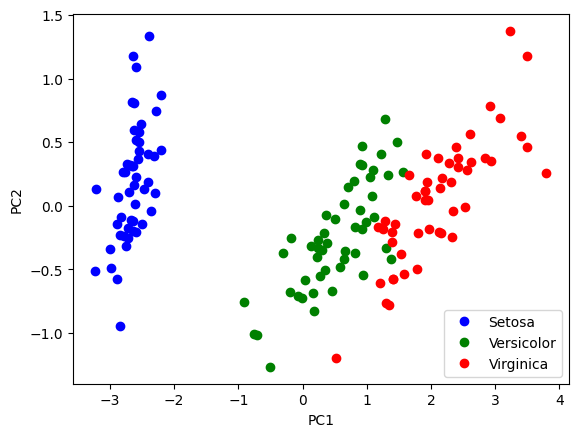

In [24]:
from sklearn import decomposition

feature_li = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = iris_df[feature_li]
y = iris_df.target

pca = decomposition.PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

# Plotting the results of PCA
fig, ax = plt.subplots()
plt.plot(X_pca[y == 'setosa', 0], X_pca[y == 'setosa', 1], 'bo', label='Setosa')
plt.plot(X_pca[y == 'versicolor', 0], X_pca[y == 'versicolor', 1], 'go', label='Versicolor')
plt.plot(X_pca[y == 'virginica', 0], X_pca[y == 'virginica', 1], 'ro', label='Virginica')
plt.legend(loc=0)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

### Animation

* https://leemeng.tw/essence-of-principal-component-analysis.html


### Orange with NID dataset

* https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection/data
* Dimension Reduction

## LDA, Linear Discriminant Analysis

* https://www.youtube.com/watch?v=azXCzI57Yfc
* https://www.google.com/search?q=google+linear+discriminant+analysis